In [44]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


C:\Users\Rishabh Mehra\Anaconda3\lib\site-packages\IPython\core\magics\pylab.py:160: UserWarning: pylab import has clobbered these variables: ['plt']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


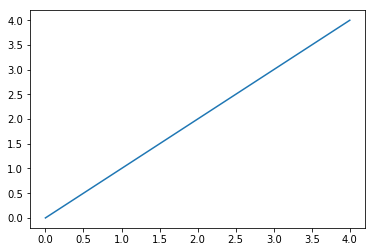

In [45]:
plot(arange(5))

In [46]:
import pandas as pd
import numpy as np
import matplotlib as plt


In [47]:
df = pd.read_csv("C:/Users/Rishabh Mehra/Desktop/train.csv") #Reading the dataset in a dataframe using Pandas

In [48]:
df.head(10)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
5,LP001011,Male,Yes,2,Graduate,Yes,5417,4196.0,267.0,360.0,1.0,Urban,Y
6,LP001013,Male,Yes,0,Not Graduate,No,2333,1516.0,95.0,360.0,1.0,Urban,Y
7,LP001014,Male,Yes,3+,Graduate,No,3036,2504.0,158.0,360.0,0.0,Semiurban,N
8,LP001018,Male,Yes,2,Graduate,No,4006,1526.0,168.0,360.0,1.0,Urban,Y
9,LP001020,Male,Yes,1,Graduate,No,12841,10968.0,349.0,360.0,1.0,Semiurban,N


In [49]:
df.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


In [50]:
df['Property_Area'].value_counts()


Semiurban    233
Urban        202
Rural        179
Name: Property_Area, dtype: int64

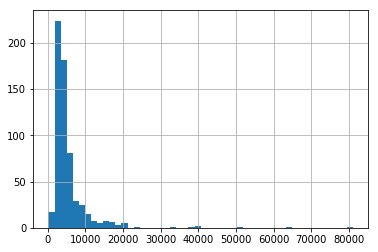

In [51]:
df['ApplicantIncome'].hist(bins=50)

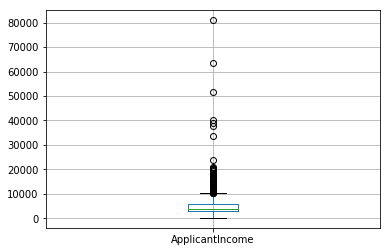

In [52]:
df.boxplot(column="ApplicantIncome")

C:\Users\Rishabh Mehra\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:57: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
  return getattr(obj, method)(*args, **kwds)


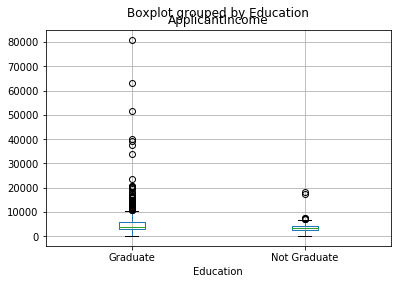

In [53]:
df.boxplot(column='ApplicantIncome' , by = 'Education')

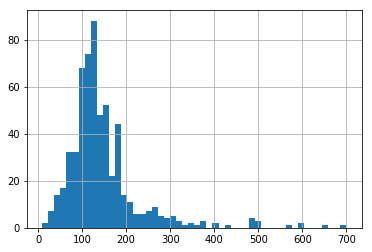

In [54]:
df['LoanAmount'].hist(bins=50)

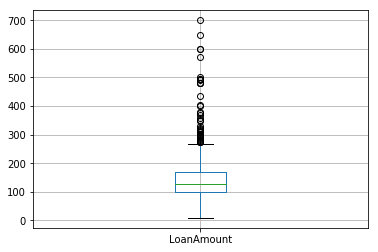

In [55]:
df.boxplot(column='LoanAmount')

In [56]:
temp1=df['Credit_History'].value_counts(ascending=True)
temp2= df.pivot_table(values='Loan_Status',index=['Credit_History','Gender'],aggfunc=lambda x: x.map({'Y':1,'N':0}).mean())
print('Frequency Table for Credit History\n')
print(temp1)
print('\n Probability of getting loan for each credit History Class :\n')
print(temp2)

Frequency Table for Credit History

0.0     89
1.0    475
Name: Credit_History, dtype: int64

 Probability of getting loan for each credit History Class :

                       Loan_Status
Credit_History Gender             
0.0            Female     0.058824
               Male       0.086957
1.0            Female     0.761905
               Male       0.803665


Text(0.5,1,'Probability of getting loan by credit history')

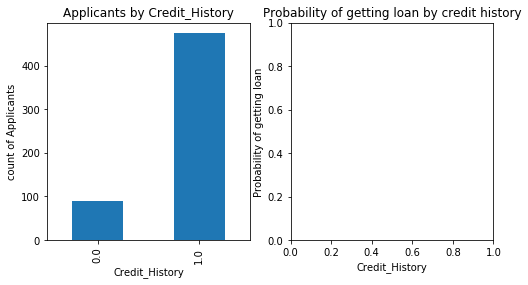

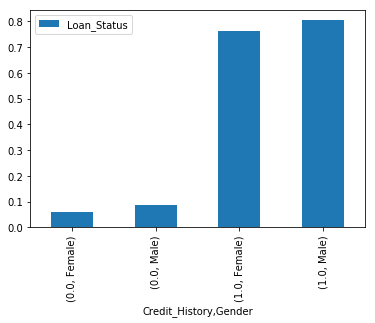

In [57]:
import matplotlib.pyplot as plt
fig = plt.figure(figsize=(8,4))
ax1=fig.add_subplot(121)
ax1.set_xlabel('Credit_History')
ax1.set_ylabel('count of Applicants')
ax1.set_title("Applicants by Credit_History")
temp1.plot(kind='bar')


ax2=fig.add_subplot(122)
temp2.plot(kind='bar')
ax2.set_xlabel('Credit_History')
ax2.set_ylabel('Probability of getting loan')
ax2.set_title("Probability of getting loan by credit history")

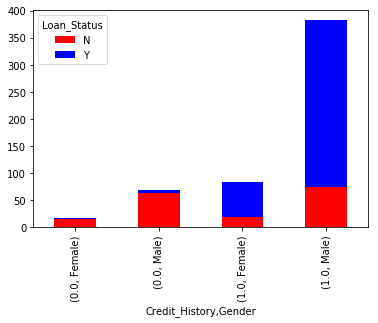

In [58]:
temp3=pd.crosstab([df['Credit_History'],df['Gender']],df['Loan_Status'])
temp3.plot(kind='bar',stacked=True,color=['red','blue'],grid=False)

In [59]:

#DATA Munging


In [60]:
df.apply(lambda x:sum(x.isnull()),axis=0)

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [61]:
df['Self_Employed'].value_counts()

No     500
Yes     82
Name: Self_Employed, dtype: int64

In [62]:
df['Self_Employed'].fillna('No',inplace=True)

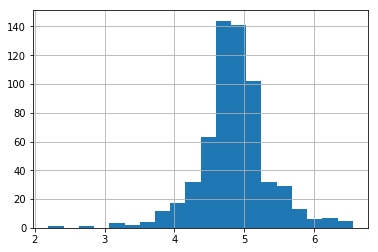

In [91]:
df['LoanAmount_log'] = np.log(df['LoanAmount'])
df['LoanAmount_log'].hist(bins=20)

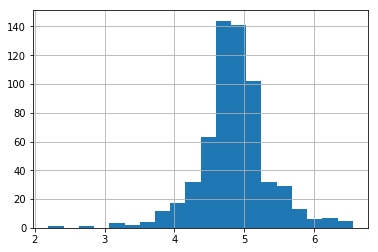

In [92]:
df['TotalIncome'] = df['ApplicantIncome'] + df['CoapplicantIncome']
df['TotalIncome_log'] = np.log(df['TotalIncome'])
df['LoanAmount_log'].hist(bins=20)

In [65]:
print (df.loc[df['LoanAmount'].isnull(), ['Self_Employed','Education', 'LoanAmount']])

    Self_Employed     Education  LoanAmount
0              No      Graduate         NaN
35             No      Graduate         NaN
63             No      Graduate         NaN
81            Yes      Graduate         NaN
95             No      Graduate         NaN
102            No      Graduate         NaN
103            No      Graduate         NaN
113           Yes      Graduate         NaN
127            No      Graduate         NaN
202            No  Not Graduate         NaN
284            No      Graduate         NaN
305            No  Not Graduate         NaN
322            No  Not Graduate         NaN
338            No  Not Graduate         NaN
387            No  Not Graduate         NaN
435            No      Graduate         NaN
437            No      Graduate         NaN
479            No      Graduate         NaN
524            No      Graduate         NaN
550           Yes      Graduate         NaN
551            No  Not Graduate         NaN
605            No  Not Graduate 

In [66]:
idx = df.loc[df['LoanAmount'].isnull(), ['Self_Employed','Education', 'LoanAmount']].index
print (idx)

Int64Index([  0,  35,  63,  81,  95, 102, 103, 113, 127, 202, 284, 305, 322,
            338, 387, 435, 437, 479, 524, 550, 551, 605],
           dtype='int64')


In [67]:
df['LoanAmount'] = df.groupby(['Education','Self_Employed'])['LoanAmount'].apply(lambda x: x.fillna(x.median()))

In [68]:
print (df.loc[df.index.isin(idx), ['Self_Employed','Education', 'LoanAmount']])

    Self_Employed     Education  LoanAmount
0              No      Graduate       130.0
35             No      Graduate       130.0
63             No      Graduate       130.0
81            Yes      Graduate       157.5
95             No      Graduate       130.0
102            No      Graduate       130.0
103            No      Graduate       130.0
113           Yes      Graduate       157.5
127            No      Graduate       130.0
202            No  Not Graduate       113.0
284            No      Graduate       130.0
305            No  Not Graduate       113.0
322            No  Not Graduate       113.0
338            No  Not Graduate       113.0
387            No  Not Graduate       113.0
435            No      Graduate       130.0
437            No      Graduate       130.0
479            No      Graduate       130.0
524            No      Graduate       130.0
550           Yes      Graduate       157.5
551            No  Not Graduate       113.0
605            No  Not Graduate 

In [69]:
df.apply(lambda x: sum(x.isnull()),axis=0)

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed         0
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount            0
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
LoanAmount_log       22
TotalIncome           0
TotalIncome_log       0
dtype: int64

In [70]:
df["Gender"].value_counts()

Male      489
Female    112
Name: Gender, dtype: int64

In [71]:
df["Gender"].fillna('Male',inplace=True)

In [72]:
df["Married"].value_counts()

Yes    398
No     213
Name: Married, dtype: int64

In [73]:
df["Married"].fillna('Yes',inplace=True)

In [74]:
df["Dependents"].value_counts()

0     345
1     102
2     101
3+     51
Name: Dependents, dtype: int64

In [75]:
df['Dependents'].fillna('0',inplace=True)

In [80]:
df['Loan_Amount_Term'].fillna(360.0,inplace=True)

In [81]:
df["Loan_Amount_Term"].value_counts()

360.0    526
180.0     44
480.0     15
300.0     13
84.0       4
240.0      4
120.0      3
36.0       2
60.0       2
12.0       1
Name: Loan_Amount_Term, dtype: int64

In [82]:
df['Credit_History'].fillna(1.0,inplace=True)

In [93]:
df.apply(lambda x: sum(x.isnull()),axis=0)

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
TotalIncome          0
LoanAmount_log       0
TotalIncome_log      0
dtype: int64

In [86]:
from sklearn.preprocessing import LabelEncoder

In [94]:
var_mod = ['Gender','Married','Dependents','Education','Self_Employed','Property_Area','Loan_Status']
le = LabelEncoder()
for i in var_mod:
    df[i] = le.fit_transform(df[i])
df.dtypes 

Loan_ID               object
Gender                 int64
Married                int64
Dependents             int64
Education              int64
Self_Employed          int64
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area          int64
Loan_Status            int64
TotalIncome          float64
LoanAmount_log       float64
TotalIncome_log      float64
dtype: object

In [95]:
#Import models from scikit learn module:
from sklearn.linear_model import LogisticRegression
from sklearn.cross_validation import KFold   #For K-fold cross validation
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn import metrics

#Generic function for making a classification model and accessing performance:
def classification_model(model, data, predictors, outcome):
  #Fit the model:
  model.fit(data[predictors],data[outcome])
  
  #Make predictions on training set:
  predictions = model.predict(data[predictors])
  
  #Print accuracy
  accuracy = metrics.accuracy_score(predictions,data[outcome])
  print ("Accuracy : %s" % "{0:.3%}".format(accuracy))

  #Perform k-fold cross-validation with 5 folds
  kf = KFold(data.shape[0], n_folds=5)
  error = []
  for train, test in kf:
    # Filter training data
    train_predictors = (data[predictors].iloc[train,:])
    
    # The target we're using to train the algorithm.
    train_target = data[outcome].iloc[train]
    
    # Training the algorithm using the predictors and target.
    model.fit(train_predictors, train_target)
    
    #Record error from each cross-validation run
    error.append(model.score(data[predictors].iloc[test,:], data[outcome].iloc[test]))
 
  print ("Cross-Validation Score : %s" % "{0:.3%}".format(np.mean(error)))

  #Fit the model again so that it can be refered outside the function:
  model.fit(data[predictors],data[outcome]) 

In [96]:
outcome_var = 'Loan_Status'
model = LogisticRegression()
predictor_var = ['Credit_History']
classification_model(model, df,predictor_var,outcome_var)

Accuracy : 80.945%
Cross-Validation Score : 80.946%


In [97]:
#We can try different combination of variables:
predictor_var = ['Credit_History','Education','Married','Self_Employed','Property_Area','TotalIncome']
classification_model(model, df,predictor_var,outcome_var)

Accuracy : 80.619%
Cross-Validation Score : 80.458%


In [103]:
model = RandomForestClassifier(n_estimators=100)
predictor_var = ['Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'Loan_Amount_Term', 'Credit_History', 'Property_Area',
        'LoanAmount_log','TotalIncome_log']
classification_model(model, df,predictor_var,outcome_var)

Accuracy : 100.000%
Cross-Validation Score : 77.201%


In [99]:
model = DecisionTreeClassifier()
predictor_var = ['Credit_History','Gender','Married','Education']
classification_model(model, df,predictor_var,outcome_var)

Accuracy : 80.945%
Cross-Validation Score : 80.946%


In [100]:
#We can try different combination of variables:
predictor_var = ['Credit_History','Loan_Amount_Term','LoanAmount_log']
classification_model(model, df,predictor_var,outcome_var)

Accuracy : 88.925%
Cross-Validation Score : 69.536%


In [104]:
#Create a series with feature importances:
featimp = pd.Series(model.feature_importances_, index=predictor_var).sort_values(ascending=False)
print (featimp)

Credit_History      0.273020
TotalIncome_log     0.261800
LoanAmount_log      0.227153
Dependents          0.056069
Property_Area       0.048328
Loan_Amount_Term    0.042427
Married             0.028772
Education           0.022408
Gender              0.020293
Self_Employed       0.019730
dtype: float64


In [105]:
model = RandomForestClassifier(n_estimators=25, min_samples_split=25, max_depth=7, max_features=1)
predictor_var = ['TotalIncome_log','LoanAmount_log','Credit_History','Dependents','Property_Area']
classification_model(model, df,predictor_var,outcome_var)

Accuracy : 83.062%
Cross-Validation Score : 81.274%
